***
## Données sur les véhicles
***

In [1]:
# Importation du module qui détermine les paths
import path

path_data = path.path_data
path_df = path.path_df
path_output = path.path_output

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Output\


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Import et nettoyage des données de véhicules
# Source des données : https://bdso.gouv.qc.ca/pls/ken/ken213_afich_tabl.page_tabl?p_iden_tran=&p_lang=&p_m_o=SAAQ&p_id_ss_domn=718&p_id_raprt=3372#tri_age=1&tri_tertr=0

cars = pd.read_excel(path_data + 'BDSOQ.xlsx', header=5)

cars_ld = cars.loc[3:4].T.reset_index().loc[1:]
pd.set_option('display.max_columns', None)
column_names = ['year', 'vt', 'cl']
cars_ld.columns.values[0:len(column_names)] = column_names
cars_ld['total'] = cars_ld['vt'] + cars_ld['cl']

# Convert 'year' column to integers
cars_ld['year'] = cars_ld['year'].astype(int)
cars_ld

,year,vt,cl,total
1,2000,2629106,816997,3446103
2,2001,2678598,843160,3521758
3,2002,2729651,870812,3600463
4,2003,2799402,917540,3716942
5,2004,2847525,955337,3802862
6,2005,2871969,990193,3862162
7,2006,2899086,1035485,3934571
8,2007,2932451,1088787,4021238
9,2008,2972370,1132018,4104388
10,2009,3000245,1201962,4202207


In [4]:
# save dataframe
cars_ld.to_hdf(path_df + 'cars_ld.h5', key='s')

C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_9040\3000237640.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->integer,key->block1_values] [items->Index(['vt', 'cl', 'total'], dtype='object')]

  cars_ld.to_hdf(path_df + 'cars_ld.h5', key='s')


C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_9040\1789232794.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cars_ld['year'], rotation=45, ha='center')


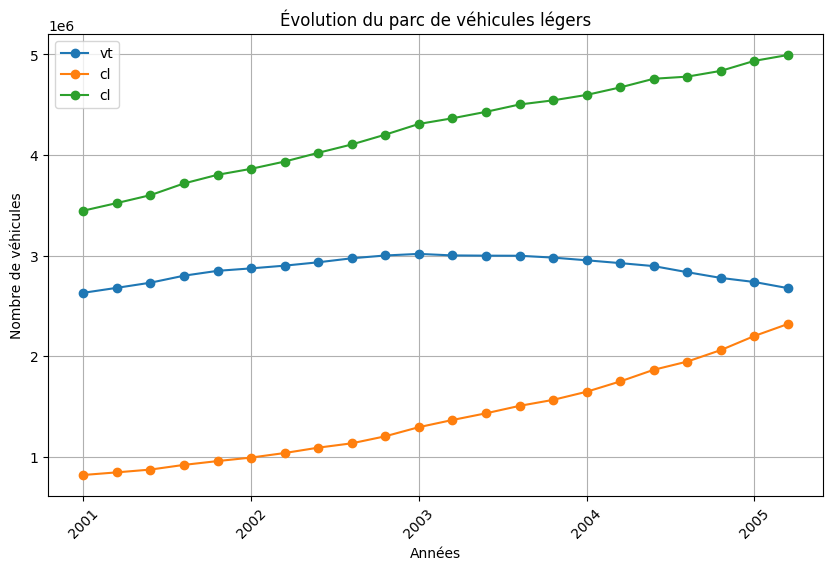

In [5]:
# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.plot(cars_ld['year'], cars_ld['vt'], marker='o', label='vt')
ax.plot(cars_ld['year'], cars_ld['cl'], marker='o', label='cl')
ax.plot(cars_ld['year'], cars_ld['total'], marker='o', label='cl')

# Add labels and title
ax.set_xlabel('Années')
ax.set_ylabel('Nombre de véhicules')
ax.set_title('Évolution du parc de véhicules légers')
ax.legend()

ax.set_xticklabels(cars_ld['year'], rotation=45, ha='center')
# Display the plot
ax.grid(True)
plt.show()